### Monte Carlo - Call Option - Euler Discretization

#### Import key libraries

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
from scipy.stats import norm 
import matplotlib.pyplot as plt
%matplotlib inline


Bad key axes.color_cycle in file /Users/esuabomdijemeni/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/ourstyle.mplstyle, line 3 ('axes.color_cycle: 19e7d8, e719ca, 191ce7, 101011, e51919, f0f214, 48f214, 1af033')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.2/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = web.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']

In [5]:
log_returns = np.log(1 + data.pct_change())

#### St = St-1 * e^((r - 0.5*stddev^2)*dt + (stdev*sqrt(dt)*Zt))

In [6]:
r = 0.025

In [27]:
# stdev = log_returns.std() * 250 ** 0.5
stdev = (log_returns.std()*pow(250, 0.5)).values
stdev

array([0.17655013])

In [28]:
type(stdev)

numpy.ndarray

In [29]:
T = 1.0
t_intervals = 250
delta_T = T/t_intervals

iterations = 10000

In [30]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
# pd.DataFrame(Z)
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0

In [31]:
S

array([[81.22732544, 81.22732544, 81.22732544, ..., 81.22732544,
        81.22732544, 81.22732544],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [32]:
for t in range(1, t_intervals + 1):
    S[t] = S[t-1] * np.exp((r - 0.5 * stdev ** 2) * delta_T + stdev * delta_T ** 0.5 * Z[t])

In [34]:
S.shape

(251, 10000)

 ...]

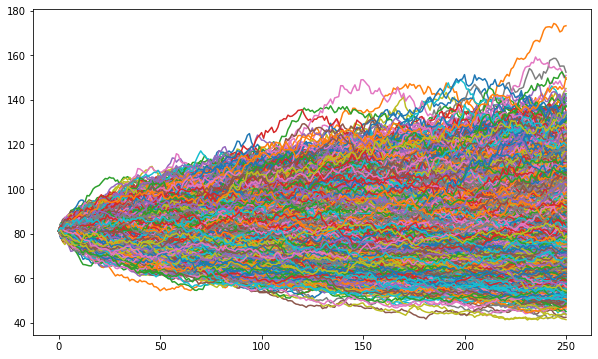

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(S[:, :])

In [37]:
p = np.maximum(S[-1] - 110, 0)

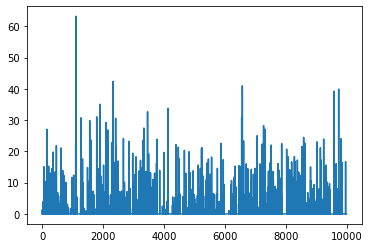

In [40]:
plt.plot(p)

In [41]:
C = np.exp(-r * T) *np.sum(p) / iterations
C

0.44654735250985433